In [1]:
import matplotlib.pyplot as plt
import numpy as np

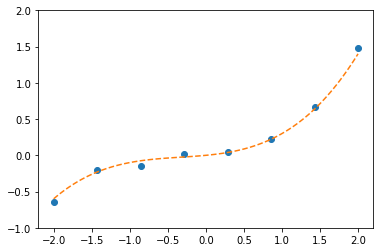

In [2]:
def g(x):
    return 0.1 * (x ** 3 + x ** 2 + x)

train_x = np.linspace(-2, 2, 8)
train_y = g(train_x) + np.random.randn(train_x.size) * 0.05

x = np.linspace(-2, 2, 100)
plt.plot(train_x, train_y, 'o')
plt.plot(x, g(x), linestyle='dashed')
plt.ylim(-1, 2)
plt.show()

In [4]:
mu = train_x.mean(axis = 0)
sigma = train_x.std(axis = 0)

def standardize(x):
    return (x - mu)/sigma

train_z = standardize(train_x)

def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    x3 = x[:, 0, np.newaxis] ** 2
    return np.hstack([x0, x, x3])

In [5]:
# 创建训练数据的矩阵
def to_matrix(x):
    return np.vstack([
        np.ones(x.size),
        x,
        x**2,
        x**3,
        x**4,
        x**5,
        x**6,
        x**7,
        x**8,
        x**9,
        x**10,
    ]).T

X = to_matrix(train_z)

In [6]:
theta = np.random.randn(X.shape[1])

def f(x):
    return np.dot(x, theta)

不应用正则化的实现

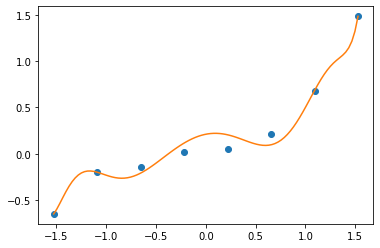

In [12]:
def E(x,y):
    return 0.5 * np.sum((y - f(x)) ** 2)

ETA = 1e-4
diff = 1
error = E(X, train_y)
while diff > 1e-6:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error

z = standardize(x)
plt.plot(train_z, train_y, 'o')
plt.plot(z, f(to_matrix(z)))
plt.show()

应用正则化的实现

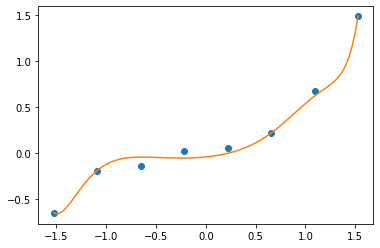

In [14]:
theta1 = theta
theta = np.random.randn(X.shape[1])

LAMBDA = 1

diff = 1

error = E(X, train_y)
while diff > 1e-6:
    reg_term = LAMBDA * np.hstack([0, theta[1:]])
    
    theta = theta - ETA * (np.dot(f(X) - train_y, X) + reg_term)
    current_error = E(X, train_y)
    diff = error - current_error
    error = current_error
    
plt.plot(train_z, train_y, 'o')
plt.plot(z, f(to_matrix(z)))
plt.show()